# Heat Map Generator

### A module for plotting "heat" maps for various player actions - defensive pressures, passes, shots, or all!

My hope for this Heat Map Generator is that it will be quite customizable - player, type of action, full 90 or just one half.. 

Let's jump right in!

[['Antoine Griezmann', [63.0, 73.0], True], ['Antoine Griezmann', [66.0, 6.0], True], ['Antoine Griezmann', [95.0, 51.0], True], ['Antoine Griezmann', [93.0, 56.0], False], ['Antoine Griezmann', [81.0, 27.0], True], ['Antoine Griezmann', [81.0, 26.0], False], ['Antoine Griezmann', [63.0, 26.0], True], ['Antoine Griezmann', [120.0, 79.0], False], ['Antoine Griezmann', [52.0, 29.0], True], ['Antoine Griezmann', [61.0, 41.0], True], ['Antoine Griezmann', [76.0, 59.0], True], ['Antoine Griezmann', [76.0, 30.0], False], ['Antoine Griezmann', [68.0, 36.0], True], ['Antoine Griezmann', [92.0, 34.0], False], ['Antoine Griezmann', [48.0, 5.0], True], ['Antoine Griezmann', [106.0, 44.0], True], ['Antoine Griezmann', [120.0, 79.0], False], ['Antoine Griezmann', [75.0, 48.0], True], ['Antoine Griezmann', [35.0, 42.0], True], ['Antoine Griezmann', [88.0, 26.0], False], ['Antoine Griezmann', [83.0, 5.0], False], ['Antoine Griezmann', [89.0, 60.0], True], ['Antoine Griezmann', [24.0, 46.0], True], ['

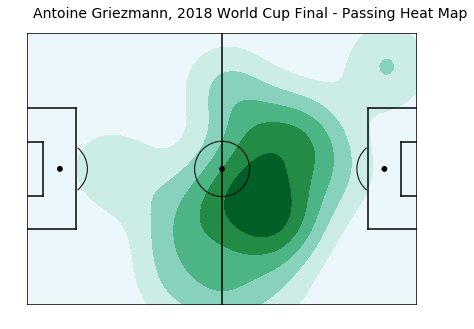

In [7]:
heatMapGenerator("8658.json", "Antoine Griezmann", "2018 World Cup Final")          


[['Olivier Giroud', [69.0, 26.0], True], ['Olivier Giroud', [61.0, 31.0], True], ['Olivier Giroud', [25.0, 33.0], False], ['Olivier Giroud', [94.0, 43.0], False], ['Olivier Giroud', [76.0, 49.0], True], ['Olivier Giroud', [91.0, 78.0], True], ['Olivier Giroud', [66.0, 24.0], False], ['Olivier Giroud', [74.0, 60.0], True], ['Olivier Giroud', [70.0, 22.0], True], ['Olivier Giroud', [102.0, 56.0], True], ['Olivier Giroud', [68.0, 48.0], True], ['Olivier Giroud', [73.0, 55.0], False], ['Olivier Giroud', [46.0, 40.0], True], ['Olivier Giroud', [85.0, 62.0], False], ['Olivier Giroud', [36.0, 4.0], True], ['Olivier Giroud', [111.0, 77.0], True], ['Olivier Giroud', [92.0, 26.0], False], ['Olivier Giroud', [27.0, 47.0], True], ['Olivier Giroud', [26.0, 49.0], True], ['Olivier Giroud', [74.0, 57.0], True], ['Olivier Giroud', [103.0, 14.0], False], ['Olivier Giroud', [75.0, 53.0], False], ['Olivier Giroud', [45.0, 69.0], False]]


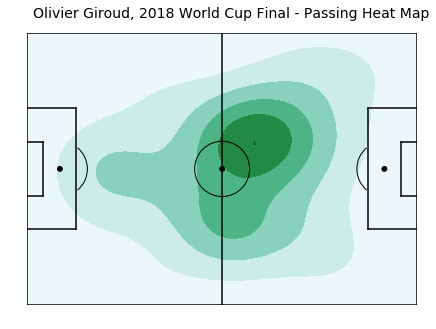

In [6]:
# Let's start out the way I start out with all generators - by parsing through the StatBomb Data. 

import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import seaborn as sns



%matplotlib inline


def heatMapGenerator(jsonName, playerName, matchName):
    
    with open(jsonName,'r') as f:
        data = json.load(f) #loads json in form of dictionaries 
        f.close()
        
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    makePitchMarkings(playerName, fig, ax, matchName)
        
    #All passes from one player
    
    passData = []
    eventData = []
    
    #Created in the order of the lists created
    player = "" 
    location = [] 
    actionType = ""
    complete = True

    for i in range(0, len(data)):
        if("pass" in data[i]):
            startLocation = data[i]["location"]
            player = data[i]["player"]["name"]
            if (player == playerName):
                
                if("outcome" in data[i]['pass']):
                    complete = False
                else:
                    complete = True
                eventData = [player, startLocation, complete]
                passData.append(eventData)   
                
    print(passData)
    
    xstart = []
    ystart = []
    for i in range(0, len(passData)):
        xstart.append(passData[i][1][0])
        ystart.append(passData[i][1][1])
        
        
    locations = [xstart, ystart]
    
    
    sns.kdeplot(locations[0], locations[1], shade = "True", n_levels=5)
    plt.ylim(0, 90)
    plt.xlim(0, 130)
    
    plt.show()
    
        
heatMapGenerator("8658.json", "Olivier Giroud", "2018 World Cup Final")          
            
    
    

In [4]:
def makePitchMarkings(player, fig, ax, matchName):

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,90], color="black")
    plt.plot([0,130],[90,90], color="black")
    plt.plot([130,130],[90,0], color="black")
    plt.plot([130,0],[0,0], color="black")
    plt.plot([65,65],[0,90], color="black")

    #Left Penalty Area
    plt.plot([16.5,16.5],[65,25],color="black")
    plt.plot([0,16.5],[65,65],color="black")
    plt.plot([16.5,0],[25,25],color="black")

    #Right Penalty Area
    plt.plot([130,113.5],[65,65],color="black")
    plt.plot([113.5,113.5],[65,25],color="black")
    plt.plot([113.5,130],[25,25],color="black")

    #Left 6-yard Box
    plt.plot([0,5.5],[54,54],color="black")
    plt.plot([5.5,5.5],[54,36],color="black")
    plt.plot([5.5,0.5],[36,36],color="black")

    #Right 6-yard Box
    plt.plot([130,124.5],[54,54],color="black")
    plt.plot([124.5,124.5],[54,36],color="black")
    plt.plot([124.5,130],[36,36],color="black")

    #Prepare Circles
    centreCircle = plt.Circle((65,45),9.15,color="black",fill=False)
    centreSpot = plt.Circle((65,45),0.8,color="black")
    leftPenSpot = plt.Circle((11,45),0.8,color="black")
    rightPenSpot = plt.Circle((119,45),0.8,color="black")

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Prepare Arcs
    leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

    #Tidy Axes
    plt.axis('off')
    
    header = player + ", " + matchName + " - Passing Heat Map"
    ax.text(2,95, header ,color="black",size="14")
        